In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import xgboost as xgb
import matplotlib.pyplot as plt


- numpy, pandas: Handle numerical and tabular data.
- load_iris: Load the Iris dataset, a built-in dataset from sklearn.
- train_test_split: Split the dataset into training and testing sets.
- xgboost: Core library for building and training XGBoost models.

In [2]:
# Load the dataset(The Iris dataset has 4 features and 3 classes (multi-class problem).)
iris = load_iris()
X = iris.data  # Features (sepal length, width, etc.)
y = iris.target  # Labels (Setosa, Versicolor, Virginica)


In [3]:
'''
test_size=0.2: Reserves 20% of the data for testing.
random_state=42: Ensures reproducibility.
'''
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [4]:
'''
DMatrix: Optimized data structure for XGBoost, improving speed and memory usage.
label=y_train: Sets the target labels for training data.
'''
# Convert data to DMatrix format
train_data = xgb.DMatrix(X_train, label=y_train)
test_data = xgb.DMatrix(X_test, label=y_test)


- objective: Defines the task. multi:softmax is for multi-class classification.
- eval_metric: Performance metric. mlogloss is common for multi-class tasks.
- max_depth: Controls tree complexity (avoids overfitting).
- learning_rate: Shrinks the contribution of each tree.

In [5]:
# Set XGBoost parameters
params = {
    'objective': 'multi:softmax',  # Multi-class classification
    'num_class': 3,  # Number of unique classes
    'eval_metric': 'mlogloss',  # Metric: multi-class log loss
    'max_depth': 3,  # Maximum tree depth
    'learning_rate': 0.1,  # Step size for each iteration
    'n_estimators': 100  # Number of boosting rounds
}


In [6]:
'''
num_boost_round: Number of boosting iterations.
Boosting: Combines weak learners (shallow trees) iteratively to improve performance.
'''
# Train the model
model = xgb.train(params, train_data, num_boost_round=100)


/home/mr-arthor/.local/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [12:37:27] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


In [7]:
# Predict and evaluate
y_pred = model.predict(test_data) #Prediction: The model outputs the predicted class for each test sample.


In [8]:
# Evaluate predictions
accuracy = accuracy_score(y_test, y_pred)
print(f"Classification Accuracy: {accuracy:.2f}") ##accuracy_score: Compares the predicted and true labels.
#Outputs overall classification accuracy.


Classification Accuracy: 1.00


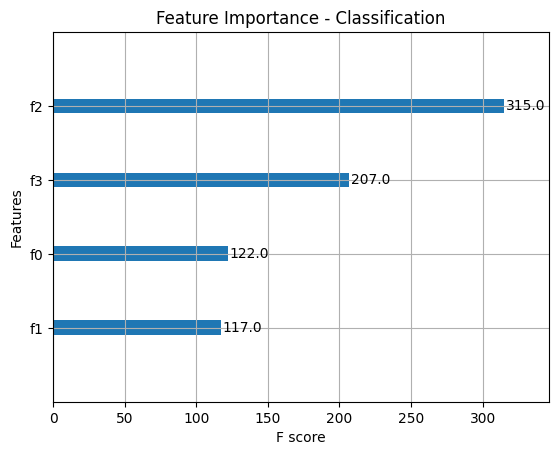

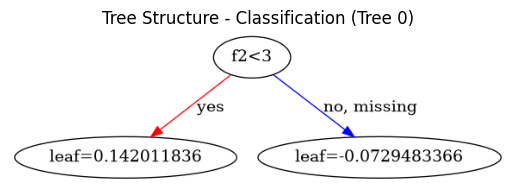

In [9]:
# Plot feature importance
xgb.plot_importance(model)
plt.title("Feature Importance - Classification")
plt.show()

# Plot tree structure
xgb.plot_tree(model, num_trees=0)
plt.rcParams['figure.figsize'] = [10, 7]
plt.title("Tree Structure - Classification (Tree 0)")
plt.show()
